In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
import matplotlib.colors as mcolors
from pygimli.viewer import pv

In [2]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [3]:
plc = mt.createWorld(start=[0, -150, 0], end=[235, 150, -90])
plc1 = mt.createWorld(start=[235, -150, 0], end=[0, 150, -90])

ax, _ = pg.show(plc, markers=True, alpha=0.5)

Widget(value='<iframe src="http://localhost:50203/index.html?ui=P_0x278692af390_0&reconnect=auto" class="pyvis…

In [4]:
shm = ert.load(dir+"res2dinv_inputs/ERT_eastern_perpendicular_gps.dat")



06/09/24 - 14:29:32 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


In [5]:
for s in shm.sensors():
    plc1.createNode(s)

In [6]:
mesh = mt.createMesh(plc1, quality=33, area=1000)
pg.show(mesh, markers=True, showMesh=True, alpha=0.5)

06/09/24 - 14:29:43 - pyGIMLi - WARNING - Given data fits neither cell count nor node count:
06/09/24 - 14:29:43 - pyGIMLi - WARNING - 24141 vs. 0 vs. 1099


Widget(value='<iframe src="http://localhost:50203/index.html?ui=P_0x2786c4997d0_1&reconnect=auto" class="pyvis…

(<pyvista.plotting.plotter.Plotter at 0x2786c4997d0>, None)

06/09/24 - 14:29:58 - pyGIMLi - INFO - Calculate geometric factors.


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2786c59e610>)

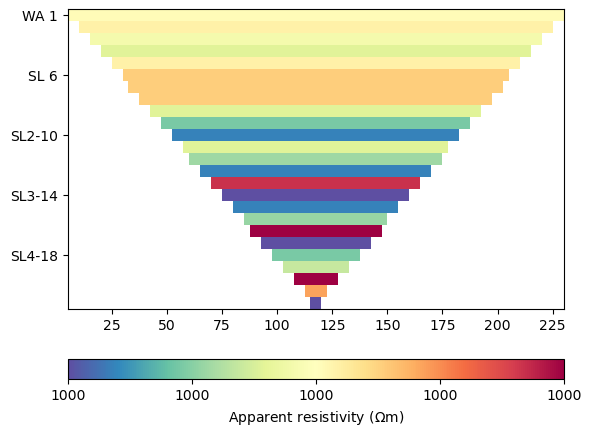

In [7]:
hom = ert.simulate(mesh, res=1000.0, scheme=shm, verbose=True)
hom['err'] = ert.estimateError(hom, relativeError=0.03, absoluteUError=5e-5)
hom.remove(np.isnan(hom["err"]))
ert.showData(hom)

In [8]:
mgr = ert.ERTManager(hom)
model = mgr.invert(hom, mesh=mesh, lam=20, verbose=True)


06/09/24 - 14:30:15 - pyGIMLi - INFO - Found 1 regions.
06/09/24 - 14:30:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/09/24 - 14:30:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/09/24 - 14:30:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 17494 Cells: 92176 Boundaries: 96564
06/09/24 - 14:30:20 - pyGIMLi - INFO - Use median(data values)=999.9999999943747
06/09/24 - 14:30:20 - pyGIMLi - INFO - Created startmodel from forward operator: 11522, min/max=1000.000000/1000.000000
06/09/24 - 14:30:20 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000278653A5120>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027805F90A90>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000278653A4900>
min/max (data): 1000/1000
min/max (error): 3%/3.1%
min/max (start model): 1000/1000
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =    0.00
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =    0.00 (dPhi = -4.04%) lam: 20.0


################################################################################
#                  Abort criterion reached: chi² <= 1 (0.00)                   #
################################################################################


In [9]:
pd = mgr.paraDomain
pd["res"] = mgr.model
pl, _ = pg.show(pd, label="res", cMap="Spectral_r", alpha=0.5,
                )
#pv.drawMesh(pl, pd, label="res", style="surface", cMap="Spectral_r",
#            filter={"slice": dict(normal=[-1, 0, 0], origin=[5, 15, -2])})

_ = pl.show()

Widget(value='<iframe src="http://localhost:50203/index.html?ui=P_0x2786c5f3e10_2&reconnect=auto" class="pyvis…

Widget(value='<iframe src="http://localhost:50203/index.html?ui=P_0x2786c5f3e10_2&reconnect=auto" class="pyvis…

In [10]:
air1 = mt.createCube(start=[0, -150, 0], end=[235, -20, -10])
air2 = mt.createCube(start=[0, 20, 0], end=[235, 150, -10])

air3 = mt.createCube(start=[0, -150, 0], end=[235, -50, -10])
air4 = mt.createCube(start=[0, 50, 0], end=[235, 150, -10])

air5 = mt.createCube(start=[0, -150, 0], end=[235, -100, -10])
air6 = mt.createCube(start=[0, 100, 0], end=[235, 150, -10])
#air1.addRegionMarker([230, -110, -5], marker=2)  
#air2.addRegionMarker([230, 110, -5], marker=2) 

plc_wide = plc + air1 + air2
plc_mid = plc + air3 + air4
plc_thin = plc + air5 + air6

ax, _ = pg.show(plc_thin, alpha=0.5)

Widget(value='<iframe src="http://localhost:50203/index.html?ui=P_0x278061de6d0_3&reconnect=auto" class="pyvis…

In [11]:
ax, _ = pg.show(plc_mid, alpha=0.5)

Widget(value='<iframe src="http://localhost:50203/index.html?ui=P_0x278061dd190_4&reconnect=auto" class="pyvis…

In [12]:
ax, _ = pg.show(plc_wide, alpha=0.5)

Widget(value='<iframe src="http://localhost:50203/index.html?ui=P_0x2781e225810_5&reconnect=auto" class="pyvis…

In [13]:
#for s in shm.sensors():
#    plc2.createNode(s)

#ax, _ = pg.show(plc2, alpha=0.5, markers=True)
mesh_air_thin = mt.createMesh(plc_thin, quality=33, area=1000)
mesh_air_mid = mt.createMesh(plc_mid, quality=33, area=1000)
mesh_air_wide = mt.createMesh(plc_wide, quality=33, area=1000)

pg.show(mesh_air_thin, mesh_air_thin.cellMarkers(), showMesh=True, alpha=0.5)

Widget(value='<iframe src="http://localhost:50203/index.html?ui=P_0x2781e2aa710_6&reconnect=auto" class="pyvis…

(<pyvista.plotting.plotter.Plotter at 0x2781e2aa710>, None)

In [25]:
res_air = [[1, 1000000.0], [2, 1000.0]]

air_thin = ert.simulate(mesh_air_thin, res=res_air, scheme=shm, verbose=True)
air_thin['err'] = ert.estimateError(air_thin, relativeError=0.03, absoluteUError=5e-5)
air_thin.remove(np.isnan(air_thin["err"]))

air_mid = ert.simulate(mesh_air_mid, res=res_air, scheme=shm, verbose=True)
air_mid['err'] = ert.estimateError(air_mid, relativeError=0.03, absoluteUError=5e-5)
air_mid.remove(np.isnan(air_mid["err"]))

air_wide = ert.simulate(mesh_air_wide, res=res_air, scheme=shm, verbose=True)
air_wide['err'] = ert.estimateError(air_wide, relativeError=0.03, absoluteUError=5e-5)
air_wide.remove(np.isnan(air_wide["err"]))

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x27914e13790>)

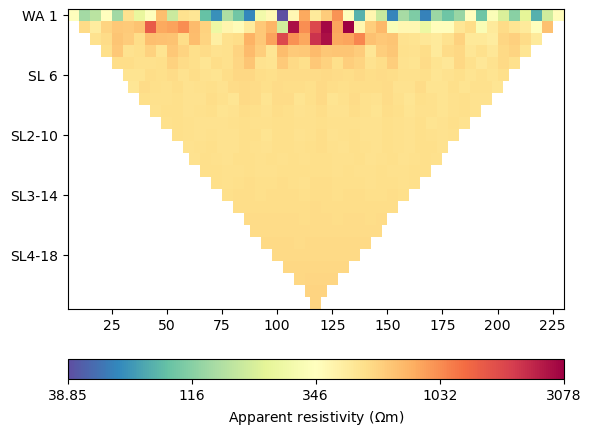

In [26]:
ert.showData(air_thin)

In [27]:
mgr = ert.ERTManager(air_thin)
model_thin = mgr.invert(air_thin, lam=20, verbose=True)

06/09/24 - 15:04:53 - pyGIMLi - INFO - Found 2 regions.
06/09/24 - 15:04:53 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/09/24 - 15:04:53 - pyGIMLi - INFO - Found 2 regions.
06/09/24 - 15:04:53 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/09/24 - 15:04:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/09/24 - 15:04:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/09/24 - 15:04:53 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2011 Cells: 3760 Boundaries: 2950
06/09/24 - 15:04:53 - pyGIMLi - INFO - Use median(data values)=533.97576968301
06/09/24 - 15:04:53 - pyGIMLi - INFO - Created startmodel from forward operator: 736, min/max=533.975770/533.975770
06/09/24 - 15:04:53 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027914EEB3D0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000278EB0B52B0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000027914E9E7F0>
min/max (data): 38.85/3078
min/max (error): 3%/3.18%
min/max (start model): 534/534
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  190.91
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  140.99 (dPhi = 25.61%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   97.94 (dPhi = 26.87%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   79.26 (dPhi = 13.17%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   78.65 (dPhi = 0.65%) lam: 20.0
###############

06/09/24 - 15:07:49 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_thin\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_thin\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_thin\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

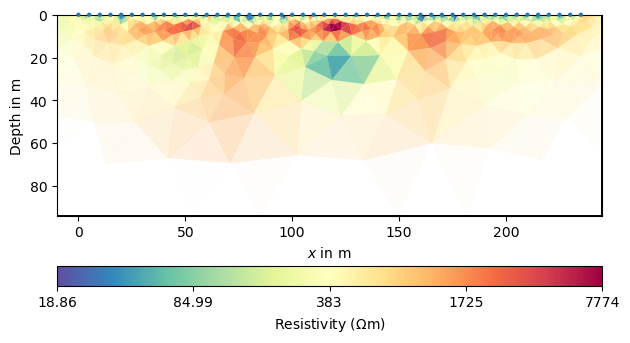

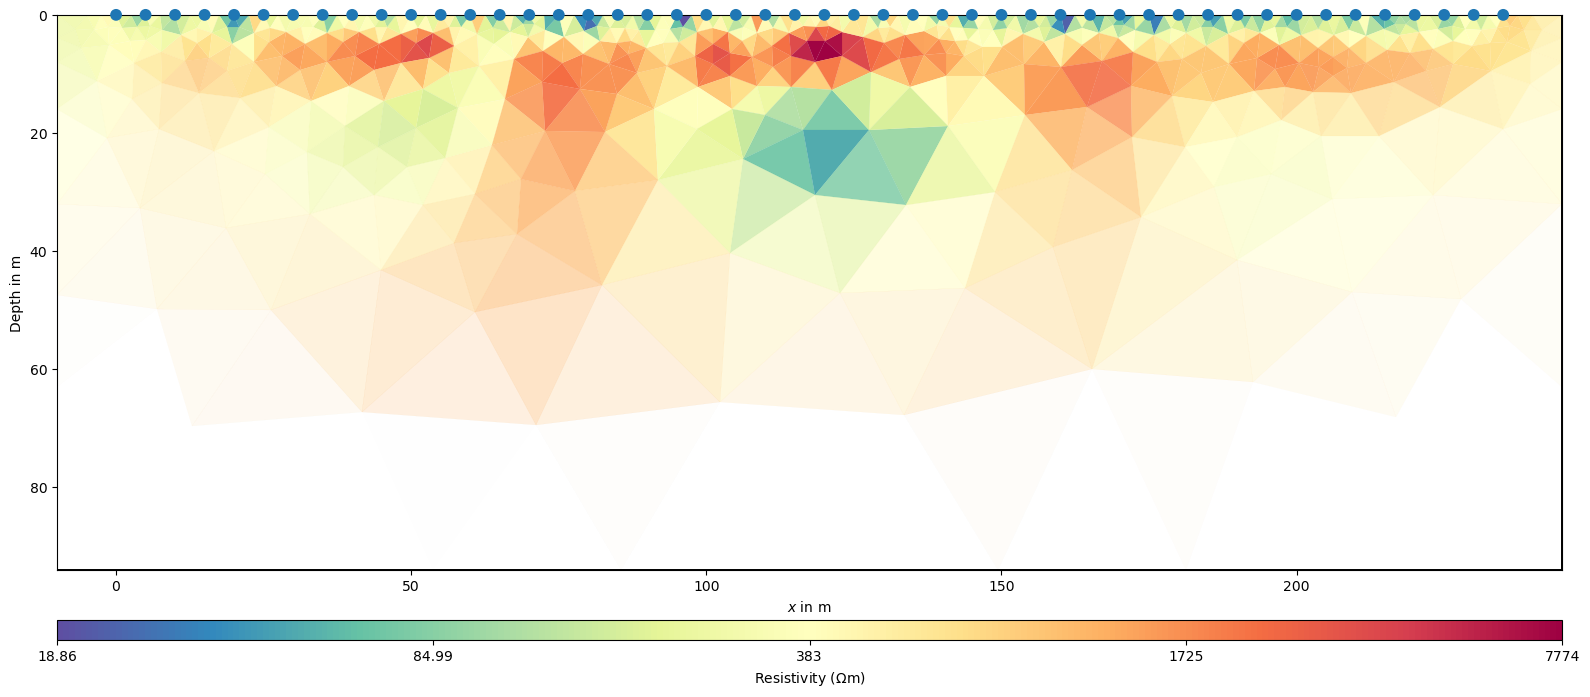

In [28]:
mgr.showResult(model_thin)
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_air_thin')

In [29]:
mgr = ert.ERTManager(air_mid)
model_mid = mgr.invert(air_mid, lam=20, verbose=True)

06/09/24 - 15:07:58 - pyGIMLi - INFO - Found 2 regions.
06/09/24 - 15:07:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/09/24 - 15:07:58 - pyGIMLi - INFO - Found 2 regions.
06/09/24 - 15:07:58 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/09/24 - 15:07:58 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/09/24 - 15:07:58 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/09/24 - 15:07:58 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2011 Cells: 3760 Boundaries: 2950
06/09/24 - 15:07:58 - pyGIMLi - INFO - Use median(data values)=543.6270027220447
06/09/24 - 15:07:58 - pyGIMLi - INFO - Created startmodel from forward operator: 736, min/max=543.627003/543.627003
06/09/24 - 15:07:58 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x0000027914EB5DF0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002781DF8A200>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x0000027916083920>
min/max (data): 58.35/1012
min/max (error): 3%/3.17%
min/max (start model): 544/544
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  138.66
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   82.39 (dPhi = 39.41%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   59.44 (dPhi = 22.89%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   51.83 (dPhi = 7.16%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   51.29 (dPhi = 1.73%) lam: 20.0
################

06/09/24 - 15:08:12 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_mid\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_mid\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_mid\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

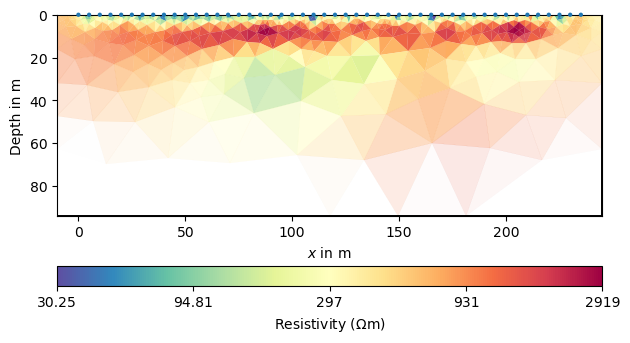

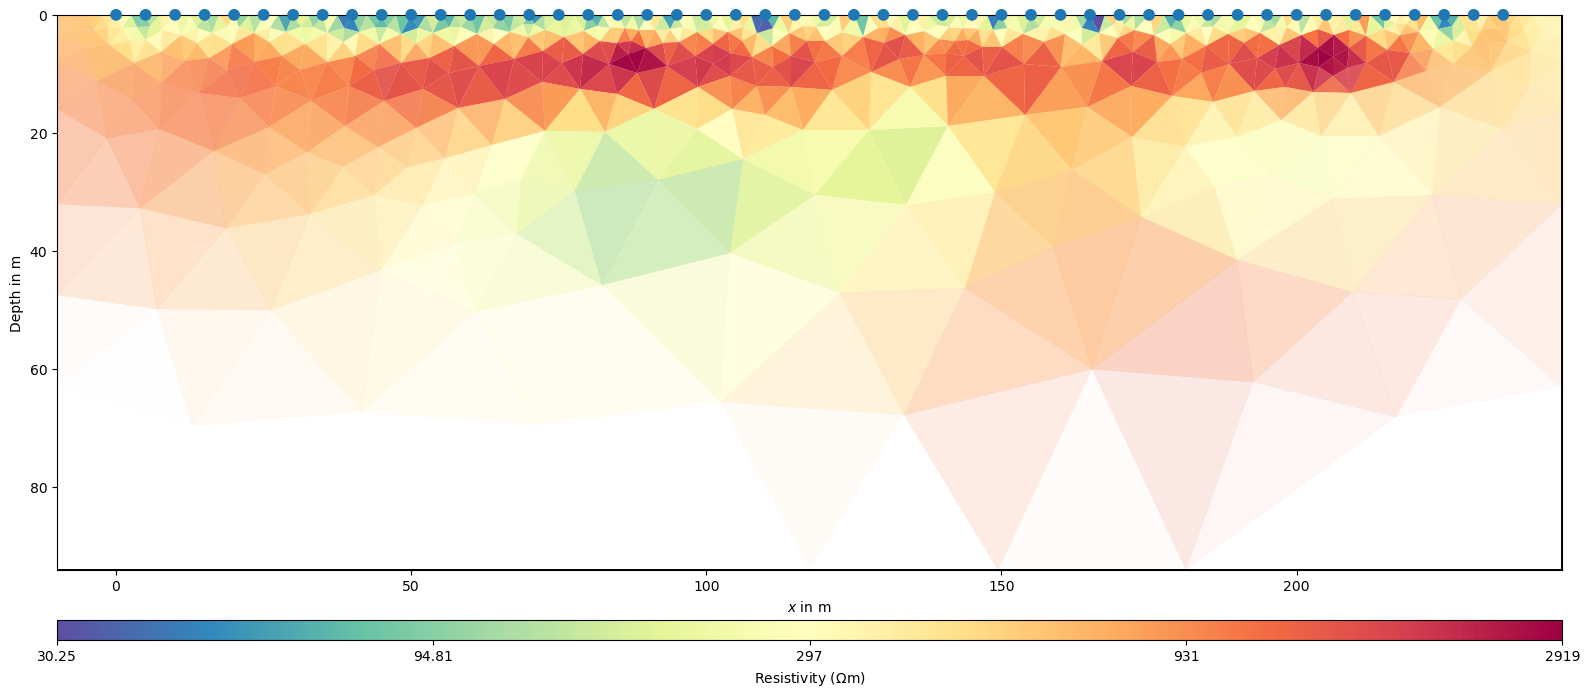

In [30]:
mgr.showResult(model_mid)
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_air_mid')

In [31]:
mgr = ert.ERTManager(air_wide)
model_wide = mgr.invert(air_wide, lam=20, verbose=True)

06/09/24 - 15:08:21 - pyGIMLi - INFO - Found 2 regions.
06/09/24 - 15:08:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/09/24 - 15:08:21 - pyGIMLi - INFO - Found 2 regions.
06/09/24 - 15:08:21 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
06/09/24 - 15:08:21 - pyGIMLi - INFO - Creating forward mesh from region infos.
06/09/24 - 15:08:21 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
06/09/24 - 15:08:21 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 2011 Cells: 3760 Boundaries: 2950
06/09/24 - 15:08:21 - pyGIMLi - INFO - Use median(data values)=634.0139777820413
06/09/24 - 15:08:21 - pyGIMLi - INFO - Created startmodel from forward operator: 736, min/max=634.013978/634.013978
06/09/24 - 15:08:21 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000278DF037150>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x0000027914BE84A0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x00000278DEDE3880>
min/max (data): 51.53/1910
min/max (error): 3%/3.15%
min/max (start model): 634/634
--------------------------------------------------------------------------------
inv.iter 0 ... chi² =  202.19
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  126.26 (dPhi = 36.77%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   86.28 (dPhi = 28.18%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   69.11 (dPhi = 13.22%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   65.70 (dPhi = 3.20%) lam: 20.0
---------------

06/09/24 - 15:08:45 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_wide\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/INV_3d_air_wide\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: xlabel='$x$ in m', ylabel='Depth in m'>)

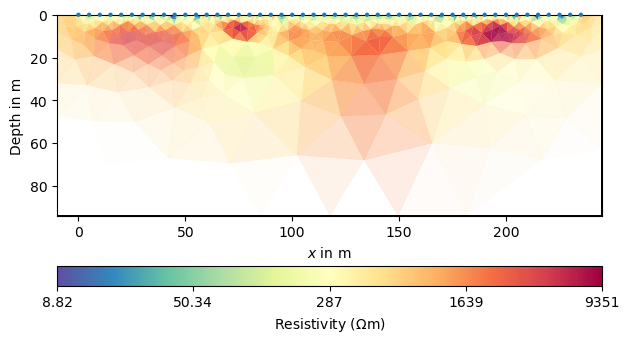

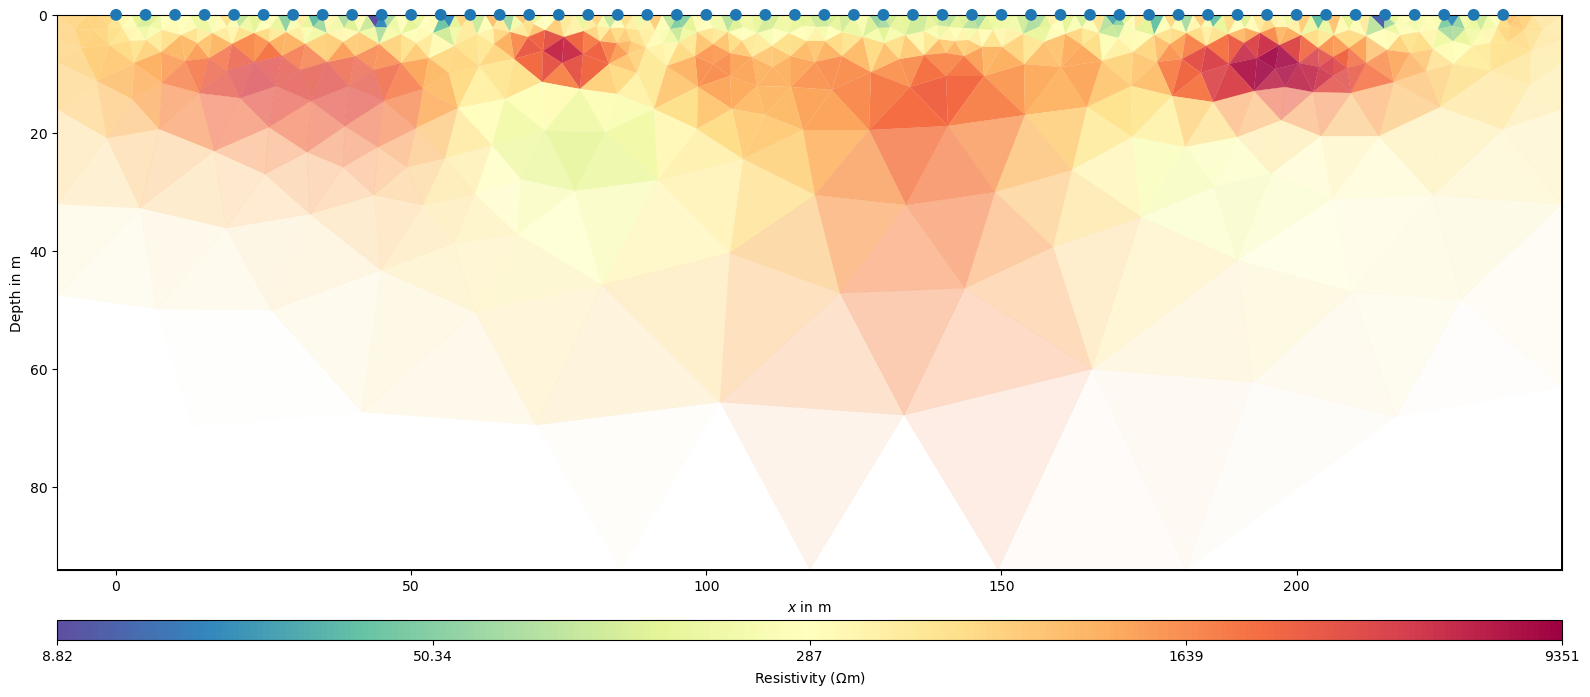

In [32]:
mgr.showResult(model_wide)
mgr.saveResult(dir+ 'pygimli/all_inversions/INV_3d_air_wide')

In [19]:
pd = mgr.paraDomain
pd["res"] = mgr.model
pl, _ = pg.show(pd, label="res", cMap="Spectral_r", alpha=0.1, style="surface", hold=True
                )
pv.drawMesh(pl, pd, label="res", style="surface", cMap="Spectral_r", alpha=0.1,
            )

_ = pl.show()


Widget(value='<iframe src="http://localhost:57592/index.html?ui=P_0x16e65112d90_9&reconnect=auto" class="pyvis…

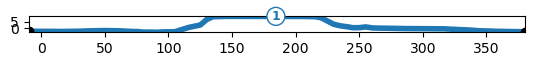

In [7]:
topography_coords = np.loadtxt(dir + "res2dinv_inputs/eastern_topo.txt")
xmin = -10
xmax = 380
ymin = -50
resolution_x = 0.5
resolution_y = 0.5
shave_off_top = 0  # Amount to shave off from the top

# Interpolate topography points
interpolated_topography = interp1d(topography_coords[:, 0], topography_coords[:, 1], kind='linear', fill_value='extrapolate')
adjusted_topography = []
# Create x coordinates for the grid
x = np.arange(xmin, xmax + resolution_x, resolution_x)

# Iterate over each x-coordinate and adjust the corresponding y-value by subtracting the shave off value
for x_val in x:
    y_val = interpolated_topography(x_val)
    adjusted_y_val = max(y_val - shave_off_top, ymin)  # Ensure the adjusted y-value doesn't go below ymin
    adjusted_topography.append(adjusted_y_val)

# Convert the list of adjusted y-values to a numpy array
adjusted_topography = np.array(adjusted_topography)
topo = np.column_stack((x, adjusted_topography))
toporeg = mt.createPolygon(topo, boundary=-1)
ax, _ = pg.show(toporeg, markers=True)

#add = [[-10, -50], [380, -50]]
#add = np.array(add)
#topo = np.vstack((add[0], topo))
#topo = np.vstack((topo, add[1]))

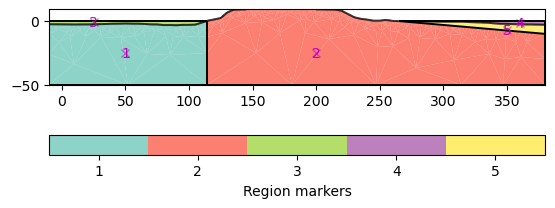

In [24]:
surf = mt.createPolygon(topo, boundaryMarker=-1)
pol1 = mt.createPolygon([[-10, 0], [-10, -50], [380, -50], [380, 0]], isSubSurface=True) 
l3 = mt.createLine([114.46263419360339, 0], [114.46263419360339, -50])
l4 = mt.createLine([265.47100473984017,0], [380, -10])
l1 = mt.createLine([-10,0], [114.46263419360339, 0], isSubSurface=False)
l2 = mt.createLine([265.47100473984017,0], [380, 0], isSubSurface=False)
new = surf+pol1+l1+l2+l3+l4
new.addRegionMarker([50, -25], marker=1)  
new.addRegionMarker([200, -25], marker=2)  
new.addRegionMarker([25, -1], marker=3)  
new.addRegionMarker([360, -1.5], marker=4) 
new.addRegionMarker([350, -7], marker=5)  
ax, _ = pg.show(new)

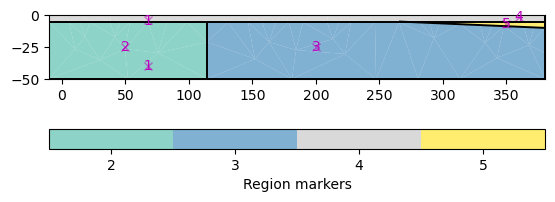

In [131]:
world = mt.createRectangle(start=[-10, 0], end=[380, -50], worldMarker=True)
pol1 = mt.createPolygon([[-10, 0], [-10, -50], [380, -50], [380, 0]], isSubSurface=True) 
#pol2 = mt.createPolygon([[-10, 0], [-10, 10], [380, 10], [380, 0]],  isSubSurface=False) 
#l1 = mt.createLine([-10,0], [114.46263419360339, 0])
#l2 = mt.createLine([265.47100473984017,0], [380.40414484508244, 0])
#l3 = mt.createLine([114.46263419360339, 0], [114.46263419360339, -50])
#l4 = mt.createLine([265.47100473984017,0], [380.40414484508244, -10])

water = mt.createRectangle(start=[-10, 0], end=[380, -5])
l3 = mt.createLine([114.46263419360339, -5], [114.46263419360339, -50])
l4 = mt.createLine([265.47100473984017,-5], [380.40414484508244, -10])
#new= pol1+pol2+toporeg+l1+l2+l3+l4
new= world+water+l3+l4
#new= plc+l1+l2+l3+l4

#new.addRegionMarker([200, 10], marker=1)  
new.addRegionMarker([50, -25], marker=2)  
new.addRegionMarker([200, -25], marker=3)  
#new.addRegionMarker([25, -1], marker=4)  
new.addRegionMarker([360, -1.5], marker=4) 
new.addRegionMarker([350, -7], marker=5)  

ax, _ = pg.show(new)

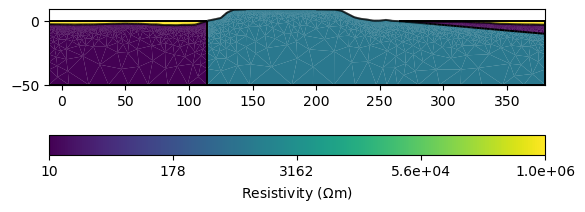

In [20]:

# Create a mesh for the finite element modelling with appropriate mesh quality.
mesh_mod = mt.createMesh(new)

rhomap_sw = [[1, 10.],
          [2, 1000.],
          [3, 1.],
          [4, 1.],
          [5, 10],
       ]

rhomap_fw = [[1, 10.],
          [2, 1000.],
          [3, 100.],
          [4, 100.],
          [5, 10],
       ]

rhomap_a = [[1, 10.],
          [2, 1000.],
          [3, 1000000.],
          [4, 1000000.],
          [5, 10],
       ]


# Take a look at the mesh and the resistivity distribution
ax, _ = pg.show(mesh_mod, logScale=True, data=rhomap_a, label=pg.unit('res'))
#ax.set_ylim(-50, 10)
#ax.set_xlim(-11,381)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1c9fed21bd0>)

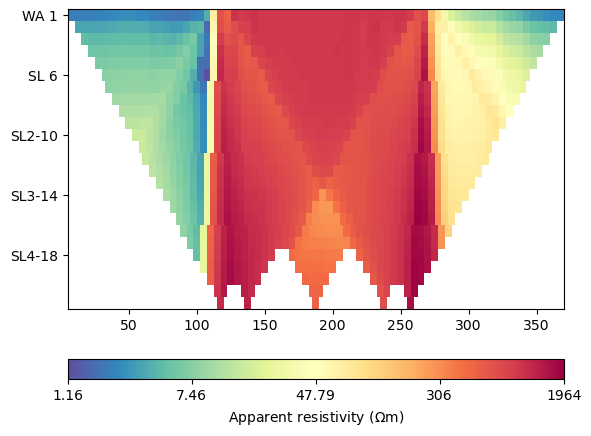

In [21]:
#t=np.arange(0, 380, 5)

#scheme = ert.createData(elecs=np.linspace(start=0, stop=380, num=76), schemeName='slm')
data_sw = ert.simulate(mesh_mod, scheme=data, res=rhomap_sw)
#data_sw.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
ert.showData(data_sw)
#data_sw
#inv_sw = mgr.invert(data_sw['rhoa' <0], lam=10, verbose=True)
#mgr.showResultAndFit()
#mgr.saveResult(dir+ 'pygimli/all_inversions/FM_lbsw')


29/05/24 - 16:55:50 - pyGIMLi - INFO - Data error estimate (min:max)  0.010000273508551203 : 0.013524585504294336


relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1916bab5a90>)

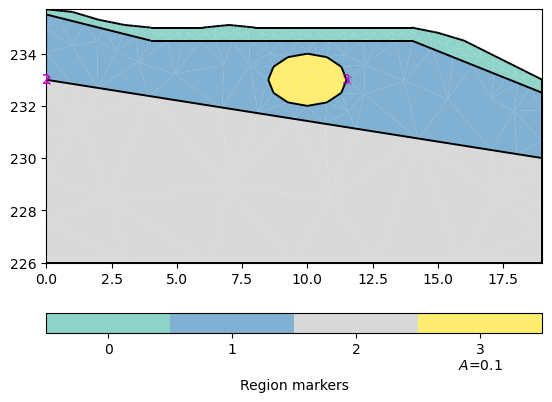

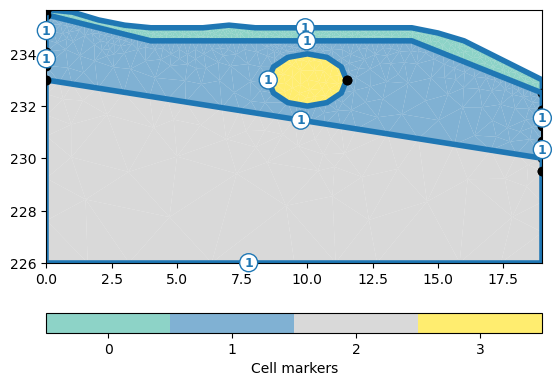

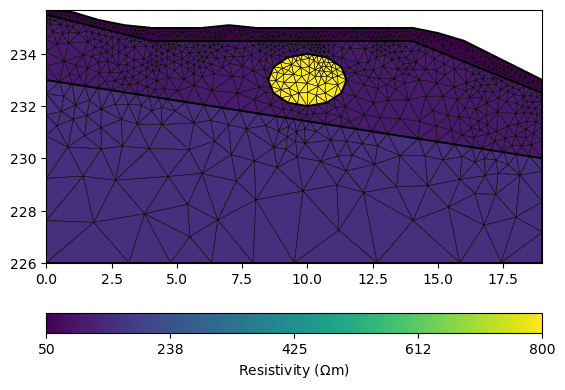

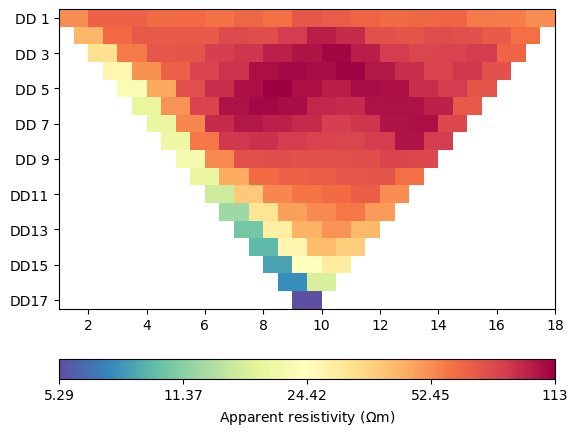

In [84]:
#Create surface layer
topo=np.array([
               [0,235.7], 
               [1,235.6], 
               [2,235.3], 
               [3,235.1],
               [4,235],
               [5,235],
               [6,235],
               [7,235.1],
               [8,235],
               [9,235],
               [10,235],
               [11,235],
               [12,235],
               [13,235],
               [14,235],
               [15,234.8],
               [16,234.5],
               [17,234],
               [18,233.5],
               [19,233]
               ])
surf = mt.createPolygon(topo, addNodes=5, interpolate='linear', isSubSurface=False)


boundary = mt.createPolygon([[19,233], [19,226], [0,226], [0,235.7], [0,226]], addNodes=5, interpolate='linear', isSubSurface=False)

#create some anomalies
top_layer = mt.createPolygon([[0, 233], [0,235.5],[4, 234.5], [14, 234.5], [19,232.5], [19,232.5], [19,230]], marker=1, interpolate='linear', isClosed=True, isSubSurface=True)
rock = mt.createPolygon([[0,233],[19, 230], [19, 226], [0,226]], marker=2, interpolate='linear', isClosed=True, isSubSurface=True)
block = mt.createCircle(pos=[10, 233], radius=[1.5, 1],  area=0.1, marker=3, isSubSurface=True, isClosed=True)

#merge anomalies with mesh, show geometry
geom = surf + boundary + top_layer + rock + block
pg.show(geom, markers=False)


#(re-)calculate mesh & show it
mesh = mt.createMesh(geom, quality=32, area=0, smooth=None)
pg.show(mesh, markers=True)

#Create a Dipole Dipole (‘dd’) measuring scheme with 21 electrodes.
t=np.arange(20)
electrode_pos=mt.interpolateAlongCurve(topo, t, method='linear')
scheme = ert.createData(electrode_pos, schemeName='dd')

#Put all electrode (aka sensors) positions into the PLC to enforce mesh refinement. Due to experience, its convenient to add further refinement nodes in a distance of 10% of electrode spacing to achieve sufficient numerical accuracy.

# for p in scheme.sensors():
#     geom.createNode(p)
#     geom.createNode(p - [0, 0.1])

#Create a mesh for the finite element modelling with appropriate mesh quality.
mesh = mt.createMesh(geom, quality=34)

#Create a map to set resistivity values in the appropriate regions
rhomap = [
          [0, 50.],
          [1, 100.],
          [2, 150.],
          [3, 800.]]


# Take a look at the mesh and the resistivity distribution
pg.show(mesh, data=rhomap, label=pg.unit('res'), showNodes=True, showMesh=True)


#Perform the modeling with the mesh and the measuring scheme itself and return a data container with apparent resistivity values, geometric factors and estimated data errors specified by the noise setting. The noise is also added to the data. Here 1% plus 1µV. Note, we force a specific noise seed as we want reproducable results for testing purposes.

data = ert.simulate(mesh, scheme=scheme, res=rhomap, noiseLevel=1, noiseAbs=1e-6, seed=1337)
ert.showData(data)

30/05/24 - 11:31:25 - pyGIMLi - INFO - Use median(data values)=5807.498201865732
30/05/24 - 11:31:25 - pyGIMLi - INFO - Created startmodel from forward operator: 1145, min/max=5807.498202/5807.498202
30/05/24 - 11:31:25 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C9FECF8040>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C9FED28540>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C9FECF8090>
min/max (data): 0.89/1.9e+04
min/max (error): 3%/9.07%
min/max (start model): 5808/5808
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 9297.12
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1001.78 (dPhi = 89.12%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  317.41 (dPhi = 67.92%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  137.34 (dPhi = 55.93%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =  120.93 (dPhi = 11.73%) lam: 10.0
----------

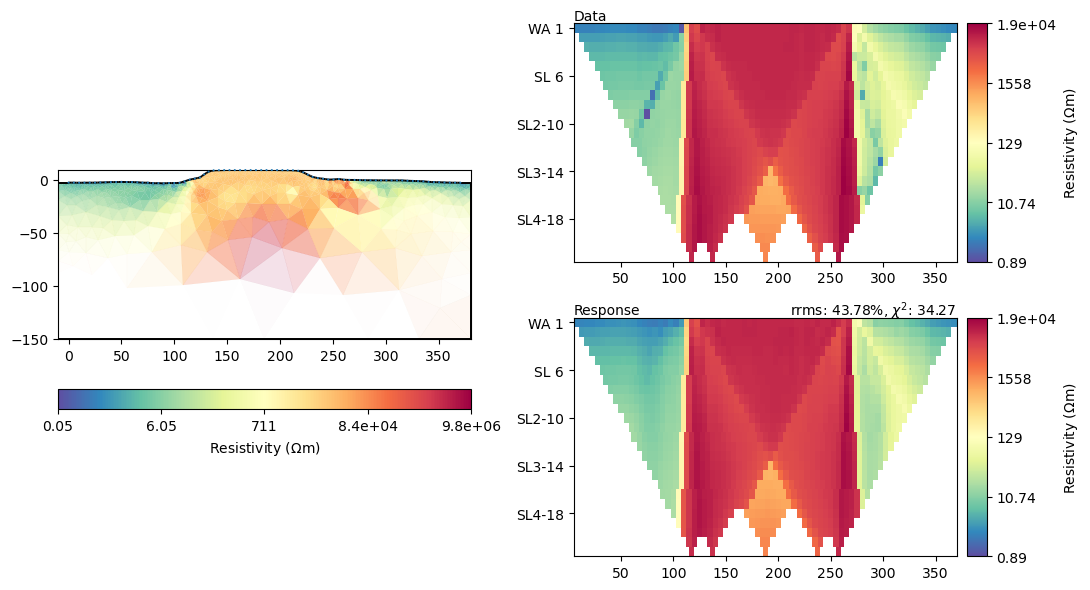

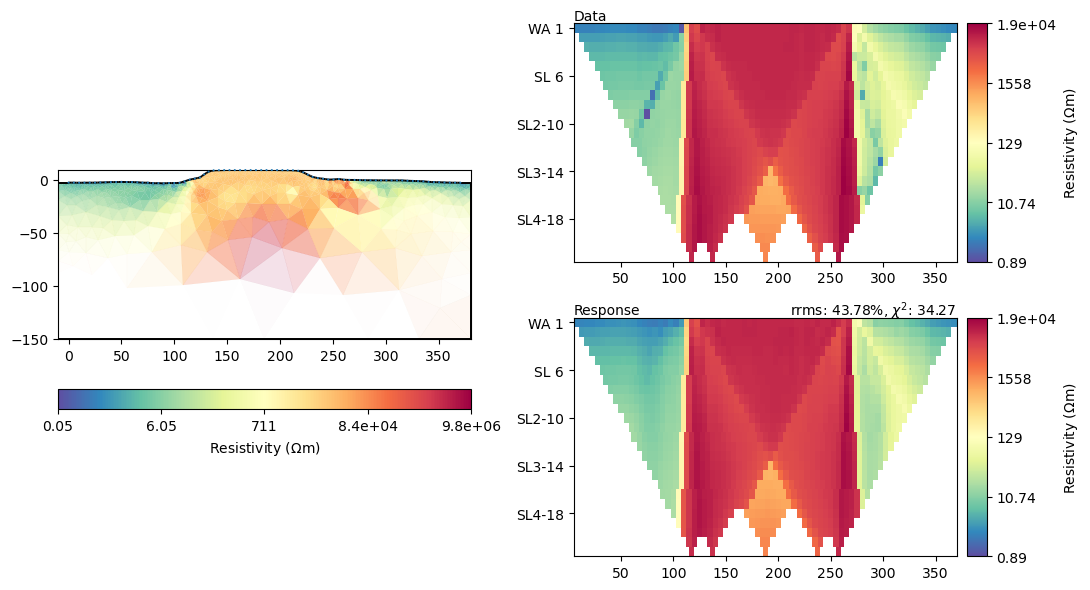

In [17]:
data_sw = ert.simulate(mesh_mod, scheme=data, res=rhomap_sw)
inv_sw = mgr.invert(data_sw, lam=10, verbose=True)
mgr.showResultAndFit()
#mgr.saveResult(dir+ 'pygimli/all_inversions/FM_hbsw')

30/05/24 - 11:50:28 - pyGIMLi - INFO - Use median(data values)=758.1212461449645
30/05/24 - 11:50:28 - pyGIMLi - INFO - Created startmodel from forward operator: 1145, min/max=758.121246/758.121246
30/05/24 - 11:50:28 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C9FECF8040>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C9FED28540>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C9FECF8090>
min/max (data): 9.65/2423
min/max (error): 3%/9.07%
min/max (start model): 758/758
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2321.36
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   75.65 (dPhi = 96.61%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   10.56 (dPhi = 83.95%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    9.58 (dPhi = 8.57%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    8.70 (dPhi = 8.43%) lam: 10.0
-----------------

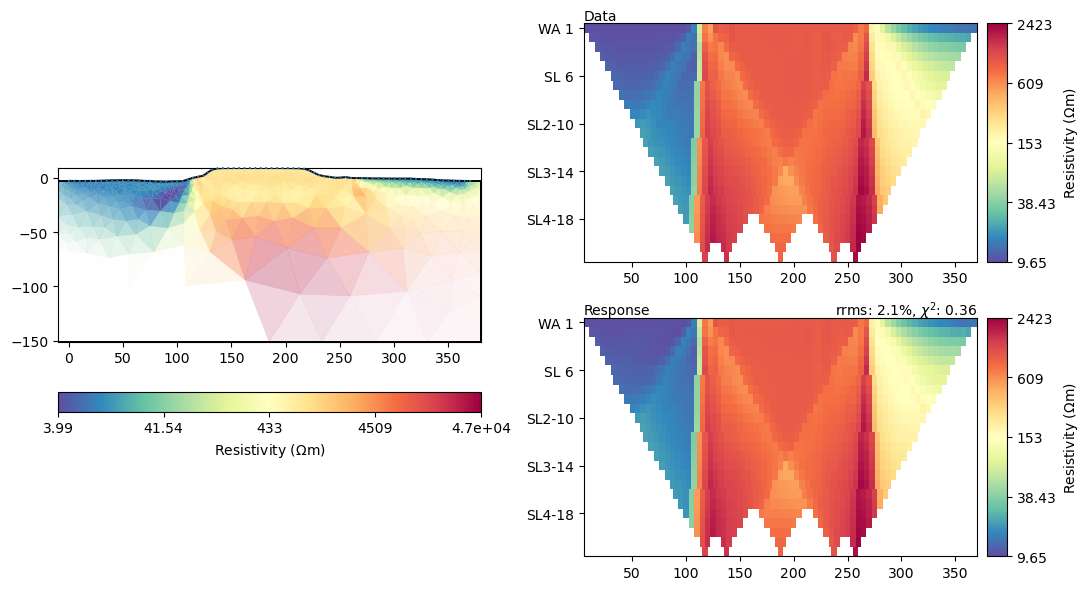

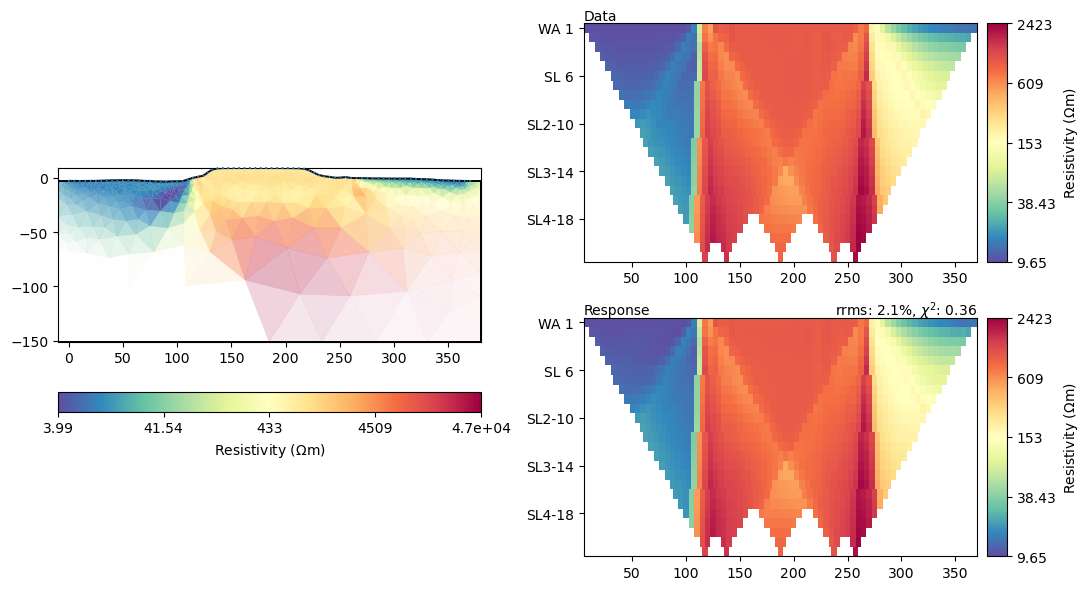

In [22]:
data_fw = ert.simulate(mesh_mod, scheme=data, res=rhomap_fw)
inv_fw = mgr.invert(data_fw, lam=10, verbose=True)
mgr.showResultAndFit()
#mgr.saveResult(dir+ 'pygimli/all_inversions/FM_lbfw')

30/05/24 - 12:04:40 - pyGIMLi - INFO - Use median(data values)=760.4447408662624
30/05/24 - 12:04:40 - pyGIMLi - INFO - Created startmodel from forward operator: 1145, min/max=760.444741/760.444741
30/05/24 - 12:04:40 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x000001C9FECF8040>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000001C9FED28540>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000001C9FECF8090>
min/max (data): 9.9/2438
min/max (error): 3%/9.07%
min/max (start model): 760/760
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2302.79
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =   74.65 (dPhi = 96.63%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =   10.48 (dPhi = 83.84%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =    9.51 (dPhi = 8.59%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =    8.47 (dPhi = 10.07%) lam: 10.0
-----------------

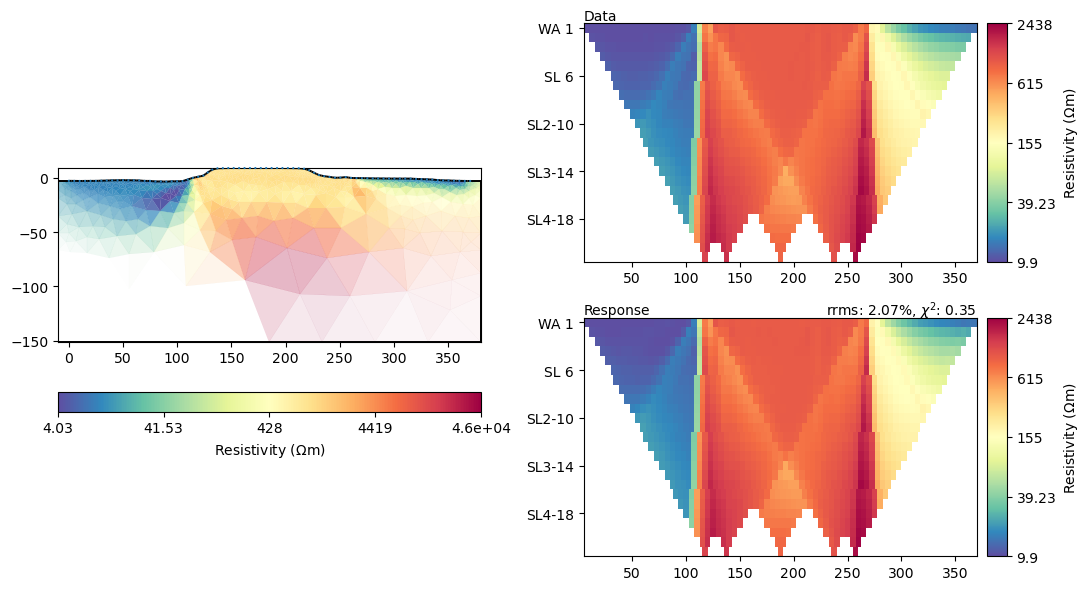

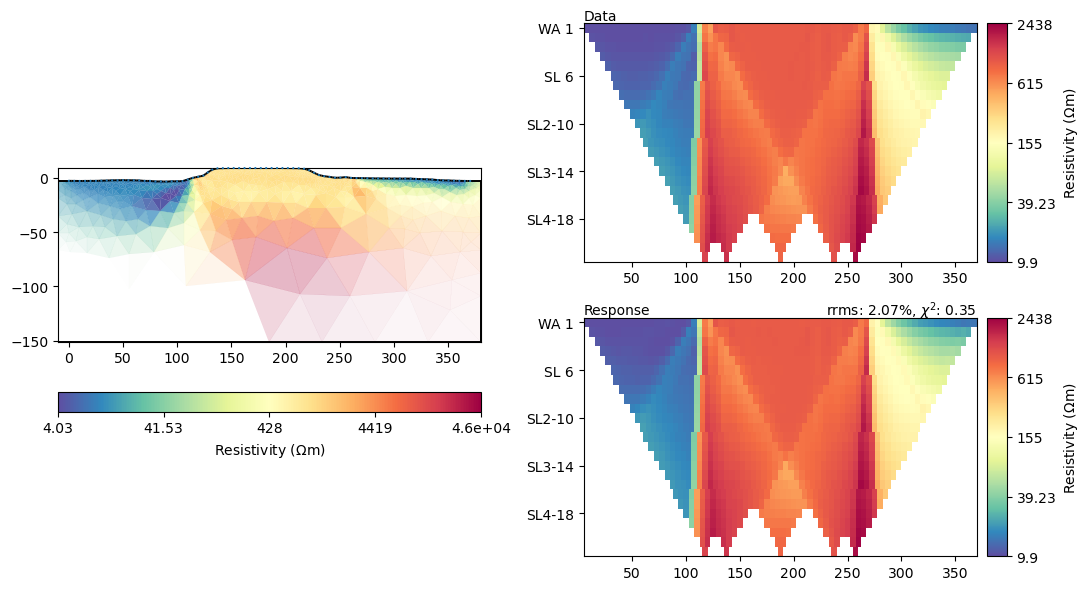

In [23]:
data_a = ert.simulate(mesh_mod, scheme=data, res=rhomap_a)
inv_a = mgr.invert(data_a, lam=10, verbose=True)
mgr.showResultAndFit()

In [8]:
mesh_hbsw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity-pd.bms')
res_hbsw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity.vector')
cov_hbsw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity-cov.vector')

mesh_lbsw = pg.load(dir+'pygimli/all_inversions/FM_lbsw/ERTManager/resistivity-pd.bms')
res_lbsw = pg.load(dir+'pygimli/all_inversions/FM_lbsw/ERTManager/resistivity.vector')
cov_lbsw = pg.load(dir+'pygimli/all_inversions/FM_lbsw/ERTManager/resistivity-cov.vector')

mesh_hbfw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity-pd.bms')
res_hbfw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity.vector')
cov_hbfw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity-cov.vector')

mesh_lbfw = pg.load(dir+'pygimli/all_inversions/FM_lbfw/ERTManager/resistivity-pd.bms')
res_lbfw = pg.load(dir+'pygimli/all_inversions/FM_lbfw/ERTManager/resistivity.vector')
cov_lbfw = pg.load(dir+'pygimli/all_inversions/FM_lbfw/ERTManager/resistivity-cov.vector')

mesh_hba = pg.load(dir+'pygimli/all_inversions/FM_hba/ERTManager/resistivity-pd.bms')
res_hba = pg.load(dir+'pygimli/all_inversions/FM_hba/ERTManager/resistivity.vector')
cov_hba = pg.load(dir+'pygimli/all_inversions/FM_hba/ERTManager/resistivity-cov.vector')

mesh_lba = pg.load(dir+'pygimli/all_inversions/FM_lba/ERTManager/resistivity-pd.bms')
res_lba = pg.load(dir+'pygimli/all_inversions/FM_lba/ERTManager/resistivity.vector')
cov_lba = pg.load(dir+'pygimli/all_inversions/FM_lba/ERTManager/resistivity-cov.vector')


Text(0.5, 86.12222222222222, 'Logarithmic Scale of Resistivity (ohm-m)')

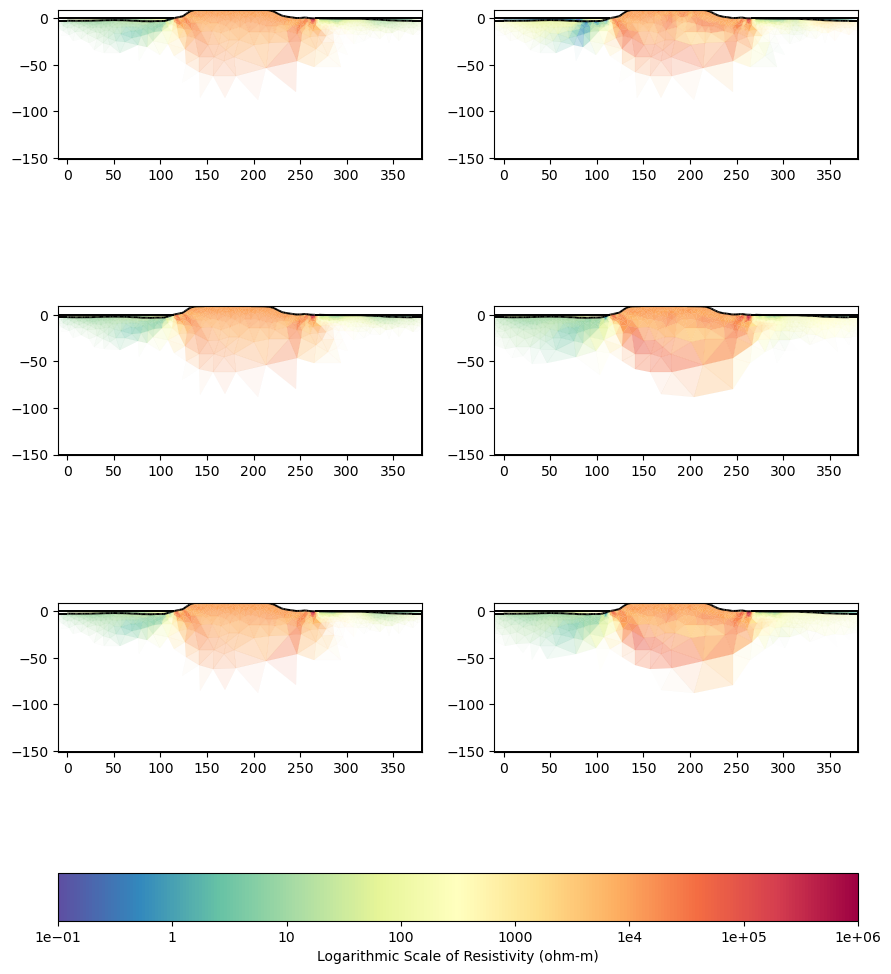

In [10]:
from matplotlib.ticker import LogLocator, LogFormatter
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

# Plot on the subplots
pg.show(mesh_hbsw, res_hbsw, logScale=True, cMap="Spectral_r", ax=ax[0, 0], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_hbsw)
pg.show(mesh_lbsw, res_lbsw, logScale=True, cMap="Spectral_r", ax=ax[0, 1], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_hbsw)
pg.show(mesh_hbfw, res_hbfw, logScale=True, cMap="Spectral_r", ax=ax[1, 0], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_hbfw)
pg.show(mesh_lbfw, res_lbfw, logScale=True, cMap="Spectral_r", ax=ax[1, 1], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_lbfw)
pg.show(mesh_hba, res_hba, logScale=True, cMap="Spectral_r", ax=ax[2, 0], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_hba)
pg.show(mesh_lba, res_lba, logScale=True, cMap="Spectral_r", ax=ax[2, 1], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_lba)


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0.2) 

# Add titles, labels, etc.
#ax[0].set_title('Eastern')
#ax[1].set_title('Western')
#ax[0].set_ylim(-50, 15)
#ax[1].set_ylim(-50, 15)
#ax.set_xlim(-11,381)


cax = fig.add_axes([0.1, 0.1, 0.8, 0.04])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=0.1, cMax=1000000, logScale=True, cMap="Spectral_r")

# Set aspect ratio to equal for both subplots
#ax[0].set_aspect(2)
#ax[1].set_aspect(1.1)


cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

RuntimeError: ./core/src/vector.h:688		GIMLI::Vector<ValueType>& GIMLI::Vector<ValueType>::operator-=(const GIMLI::Vector<ValueType>&) [with ValueType = double]  1197 != 9077

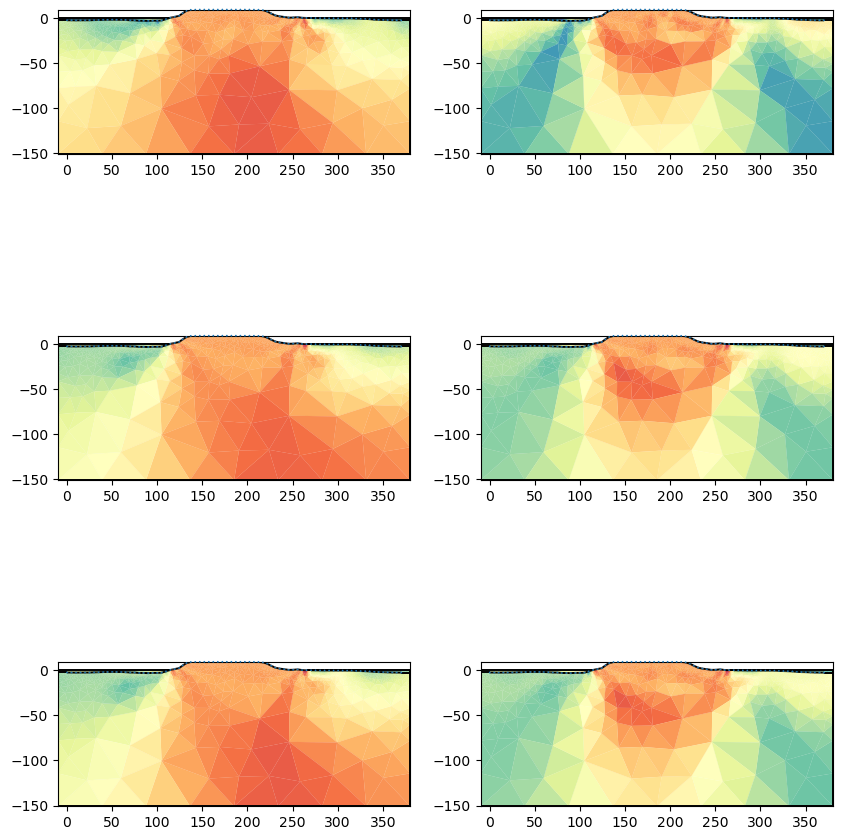

In [87]:
from matplotlib.ticker import LogLocator, LogFormatter
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

mgr.showResult(inv_hbsw, ax=ax[0, 0], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_lbsw, ax=ax[0, 1], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_hbfw, ax=ax[1, 0], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_lbfw, ax=ax[1, 1], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_hba, ax=ax[2, 0], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_lba, ax=ax[2, 1], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)



ax[0, 0].set_title('inv_hbsw')
ax[0, 1].set_title('inv_lbsw')
ax[1, 0].set_title('inv_hbfw')
ax[1, 1].set_title('inv_lbfw')
ax[2, 0].set_title('inv_hba')
ax[2, 1].set_title('inv_lba')

#ax[0, 0].text(mgr.inv.chi2(inv_hbsw), mgr.inv.absrms(inv_hbsw), mgr.inv.relrms(inv_hbsw))
#ax[0, 1].text('inv_lbsw')
#ax[1, 0].text('inv_hbfw')
#ax[1, 1].text('inv_lbfw')
#ax[2, 0].text('inv_hba')
#ax[2, 1].text('inv_lba')

#print(mgr.inv.chi2(inv_hbsw), mgr.inv.absrms(inv_hbsw), mgr.inv.relrms(inv_hbsw))



cax = fig.add_axes([0.1, 0.1, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=0.1, cMax=1000000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)


0 -10.0 -2.524
1 -10.0 -150.8110641508107
2 380.40414484508244 -150.8110641508107
3 380.40414484508244 -2.649406212777715
4 -380.40414484508244 -2.524
5 -380.40414484508244 -521.0898027831155
6 750.8082896901649 -2.649406212777715
7 750.8082896901649 -521.2152089958932
8 0.0 -2.524
9 1.2499516028108906 -2.5349995741047358
10 3.749854808432672 -2.5569987223142077
11 4.999806411243562 -2.5679982964189434
12 6.249658216467371 -2.587245694797942
13 8.749361826914988 -2.625740491555939
14 9.999213632138797 -2.6449878899349377
15 11.249135228533955 -2.630993997401589
16 13.74897842132427 -2.603006212334891
17 14.998900017719428 -2.5890123198015424
18 16.24887898062829 -2.581760956840592
19 18.748836906446023 -2.567258230918692
20 19.998815869354885 -2.5600068679577417
21 21.24880946594051 -2.556006118763748
22 23.74879665911176 -2.548004620375762
23 24.998790255697386 -2.5440038711817685
24 26.24797223120185 -2.4987934640590033
25 28.746336182210783 -2.408372649813473
26 29.995518157715246 -

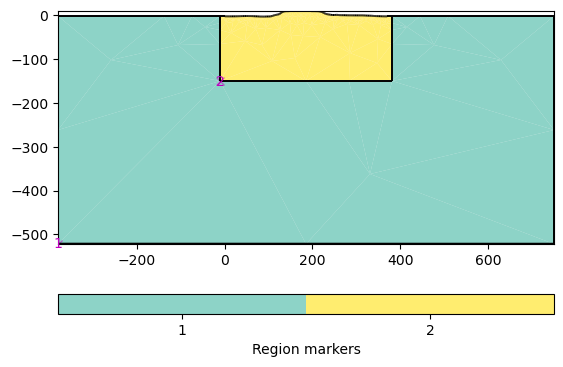

In [11]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25, boundary=1, balanceDepth=True)
ax, _ = pg.show(plc)

for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())


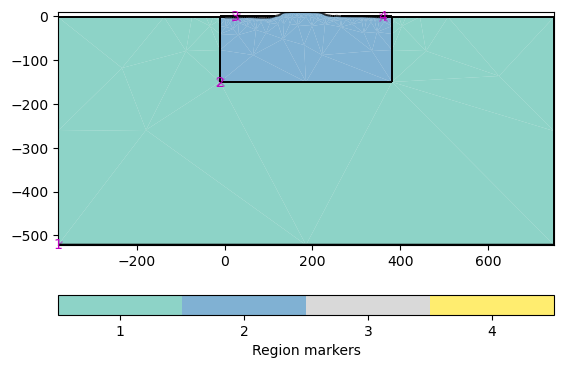

In [7]:
l1 = mt.createLine([-10,0], [-10, -5])
l2 = mt.createLine([-10,0], [114.46263419360339, 0])
l3 = mt.createLine([265.47100473984017,0], [380.40414484508244, 0])
l4 = mt.createLine([380.40414484508244,0], [380.40414484508244, -5])

plc2 = mt.mergePLC([plc, l1, l2, l3, l4])
  
plc2.addRegionMarker([25, -1], marker=3)  
plc2.addRegionMarker([360, -1.5], marker=4)  

ax, _ = pg.show(plc2)
#ax.set_ylim(-5)
#ax.set_xlim(-11,381)

08/05/24 - 09:12:01 - pyGIMLi - INFO - Found 4 regions.
08/05/24 - 09:12:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/05/24 - 09:12:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/05/24 - 09:12:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/05/24 - 09:12:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 19709 Cells: 37296 Boundaries: 29032
08/05/24 - 09:12:03 - pyGIMLi - INFO - Use median(data values)=421.875
08/05/24 - 09:12:03 - pyGIMLi - INFO - Created startmodel from forward operator: 9077, min/max=421.875000/421.875000
08/05/24 - 09:12:03 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000227BC2DBCE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000227FF7C4590>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000227800DF1B0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000227800DF220>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000227800DF290>
min/max (data): 1.82/4413
min/max (error): 3%/9.07%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2447.59
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  829.26 (dPhi = 66.11%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  639.60 (dPhi = 22.87%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  260.72 (dPhi = 59.19%) lam: 10.0
-----

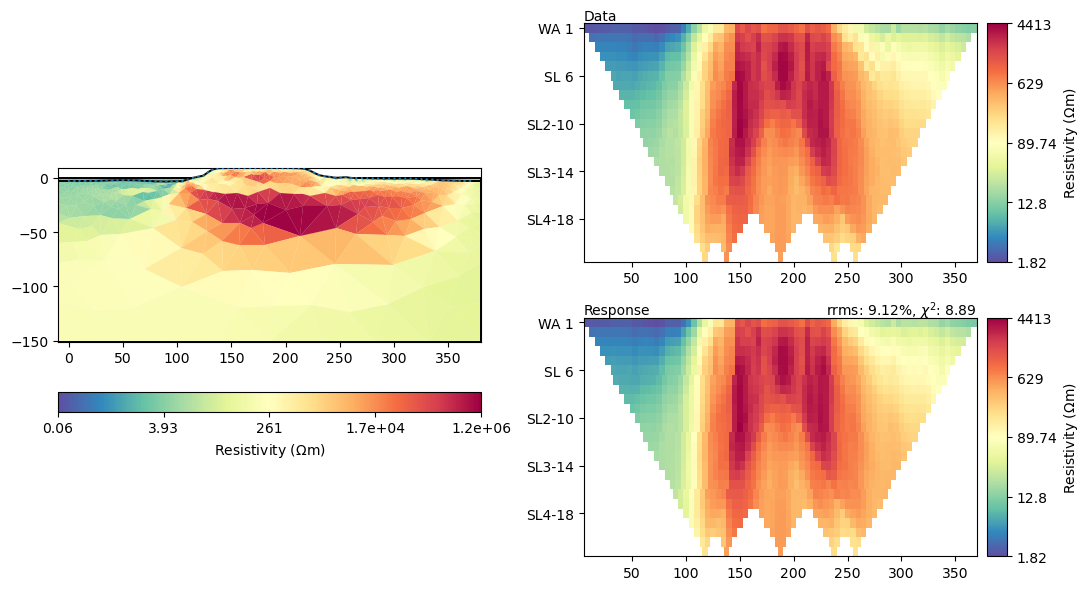

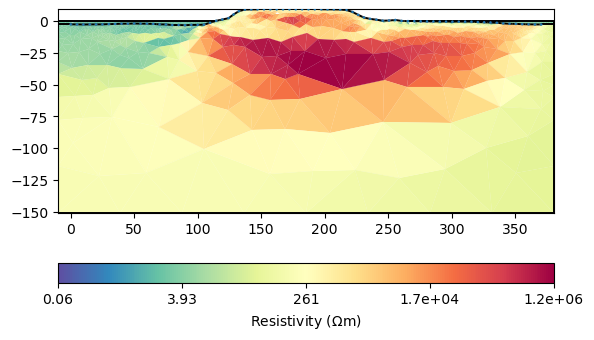

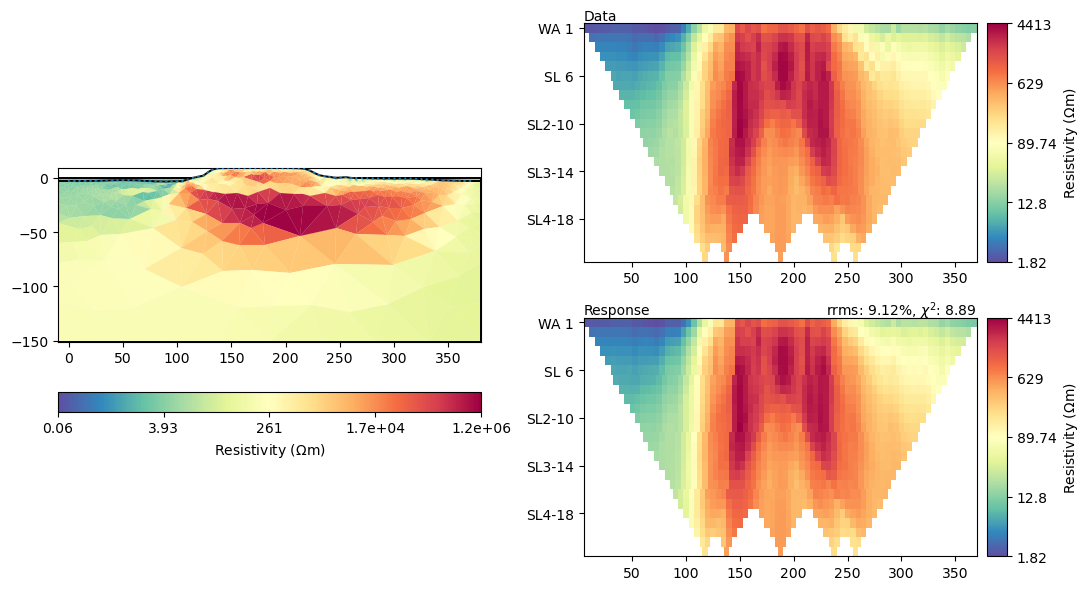

In [10]:
mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)


mgr.inv.setRegularization(3, limits=[1, 2])
mgr.inv.setRegularization(4, limits=[3, 4])

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, zWeight=0.1, RobustData=True, BlockyModel=True)

mgr.showResult()
mgr.showResultAndFit()

(-40.0, 10.28)

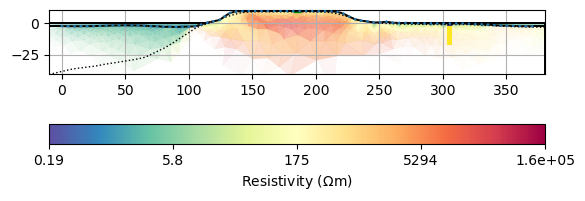

In [24]:
from pygimli.viewer.mpl import draw1DColumn

borehole4 = pd.read_csv(dir + "pygimli/borehole4.csv")
AL = np.loadtxt(dir + "pygimli/AL_eastern.txt")

x = borehole4['x']
z = borehole4['z']
r = borehole4['r']

x_AL = AL[0]
z_AL = AL[1]

ax, cb = mgr.showResult()
zz = np.abs(z)
iz = np.argsort(z)
dz = np.diff(zz[iz])
thk = np.hstack([dz, dz[-1]])
ztop = -zz[iz[0]]-dz[0]/2
colkw = dict(x=x[0], val=r[iz], thk=thk, width=4, ztopo=ztop)
draw1DColumn(ax, **colkw)
ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g_', linewidth=0.1)
ax.grid(True)
ax.set_ylim(-40)